In [ ]:
from drive.MyDrive.datas.module.preprocess import *
from drive.MyDrive.datas.module.setting_tf import *
from drive.MyDrive.datas.module.visualization import *

In [ ]:
dataset = get_dataset()

In [ ]:
datas = split_train_valid_df(dataset=dataset, img_size=224, shuffle=True)

/content/drive/MyDrive/datas/module/preprocess.py:76: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  datas['train_df'] = np.array(datas['train_df'])
/content/drive/MyDrive/datas/module/preprocess.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  datas['valid_df'] = np.array(datas['valid_df'])


In [ ]:
X_train, y_train, X_valid, y_valid = split_X_y_dataset(datas=datas)

In [ ]:
# MinMaxScaling
X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [ ]:
base_model = load_base_model("inception_resnet", input_shape=(224, 224, 3), trainable=False)

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(768, activation='elu'),
    tf.keras.layers.Dense(384, activation='elu'),
    tf.keras.layers.Dense(192, activation='elu'),
    tf.keras.layers.Dense(96, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1536)              54336736  
_________________________________________________________________
dense (Dense)                (None, 768)               1180416   
_________________________________________________________________
dense_1 (Dense)              (None, 384)               295296    
_________________________________________________________________
dense_2 (Dense)              (None, 192)               73920     
_________________________________________________________________
dense_3 (Dense)              (None, 96)                18528     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3104      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 2

In [ ]:
monitor_ls = ["val_accuracy", "val_loss"]
callbacks = setting_callback("inception_resnet", monitors=monitor_ls)

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32,
                    validation_data=(X_valid, y_valid), verbose=1,
                    callbacks=callbacks)

Epoch 1/150
221/221 [==============================] - 55s 125ms/step - loss: 0.4076 - accuracy: 0.8108 - val_loss: 0.3919 - val_accuracy: 0.8229

Epoch 00001: val_accuracy improved from -inf to 0.82292, saving model to /content/drive/MyDrive/datas/model_result/incepRes_acc.h5

Epoch 00001: val_loss improved from inf to 0.39195, saving model to /content/drive/MyDrive/datas/model_result/incepRes_loss.h5
Epoch 2/150
221/221 [==============================] - 23s 105ms/step - loss: 0.3155 - accuracy: 0.8661 - val_loss: 0.5334 - val_accuracy: 0.7588

Epoch 00002: val_accuracy did not improve from 0.82292

Epoch 00002: val_loss did not improve from 0.39195
Epoch 3/150
221/221 [==============================] - 23s 104ms/step - loss: 0.2891 - accuracy: 0.8780 - val_loss: 0.3099 - val_accuracy: 0.8734

Epoch 00003: val_accuracy improved from 0.82292 to 0.87342, saving model to /content/drive/MyDrive/datas/model_result/incepRes_acc.h5

Epoch 00003: val_loss improved from 0.39195 to 0.30990, sa

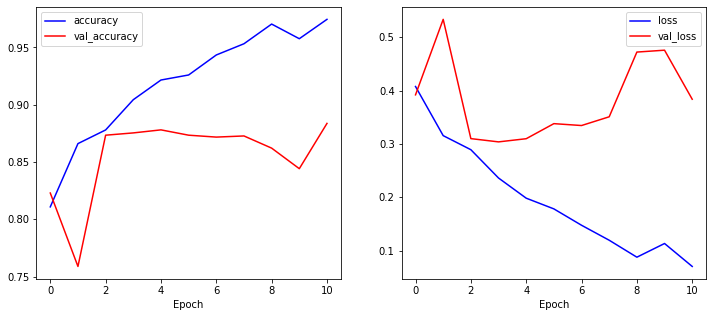

In [ ]:
make_scores_graph(history=history)